In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os
import re
import pandas as pd
%matplotlib inline

In [32]:
# EDA - See how the data look like
city_desc = pd.read_csv("../data/hotels/data/beijing.csv")
city_desc

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
china_beijing_holiday_inn_central_plaza,holiday inn central plaza,http://www.tripadvisor.com/ShowUserReviews-g29...,no.1 caiyuan street xuanwu district,beijing,-1,China,100053,-1,-1,247,4.786408,4.631068,4.733010,3.553398,4.699029,0.0,4.480583,NaN
china_beijing_hilton_beijing_wangfujing,hilton beijing wangfujing,http://www.tripadvisor.com/ShowUserReviews-g29...,no.8 wangfujing east street dongcheng,beijing,-1,China,100006,-1,-1,74,4.810345,4.844828,4.758621,4.827586,4.517241,0.0,4.751724,NaN
china_beijing_hotel_g,hotel g,http://www.tripadvisor.com/ShowUserReviews-g29...,a7 worker's stadium chaoyang district,beijing,-1,China,100020,-1,-1,110,4.769231,4.750000,4.576923,4.375000,4.653846,0.0,4.625000,NaN
china_beijing_the_regent_beijing,the regent beijing,http://www.tripadvisor.com/ShowUserReviews-g29...,no.99 jinbao street dongcheng district,beijing,-1,China,100005,-1,-1,111,4.625000,4.812500,4.437500,4.645833,4.531250,0.0,4.610417,NaN
china_beijing_the_st_regis_beijing,the st regis beijing,http://www.tripadvisor.com/ShowUserReviews-g29...,no.21jianguomenwai street chaoyang district,beijing,-1,China,100020,-1,-1,89,4.846154,4.646154,4.615385,4.492308,4.184615,0.0,4.556923,NaN
china_beijing_park_plaza_beijing_wangfujing,park plaza beijing wangfujing,http://www.tripadvisor.com/ShowUserReviews-g29...,no.97 jinbao street dongcheng district,beijing,-1,China,100005,-1,-1,280,4.796610,4.605932,4.512712,4.610169,4.584746,0.0,4.622034,NaN
china_beijing_the_ritz_carlton_huamao_center,the ritz carlton huamao center,http://www.tripadvisor.com/ShowUserReviews-g29...,no.83a jianguo road chaoyang district,beijing,-1,China,100025,-1,-1,33,4.925926,4.814815,4.740741,3.962963,4.555556,0.0,4.600000,NaN
china_beijing_the_opposite_house,the opposite house,http://www.tripadvisor.com/ShowUserReviews-g29...,building 1 no.11 sanlitun road,beijing,-1,China,100027,-1,-1,32,4.966667,4.866667,4.800000,4.700000,4.366667,0.0,4.740000,NaN
china_beijing_double_happiness_courtyard_hotel,double happiness courtyard hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,no.37 dongsi sitiao dongcheng district,beijing,-1,China,100010,-1,-1,35,4.666667,4.333333,4.606061,4.242424,4.454545,0.0,4.460606,NaN
china_beijing_intercontinental_financial_street_beijing,intercontinental financial street beijing,http://www.tripadvisor.com/ShowUserReviews-g29...,no.11 financial street xicheng district,beijing,-1,China,100140,-1,-1,69,4.803279,4.819672,4.508197,3.803279,4.409836,0.0,4.468852,NaN


In [33]:
f = open("../data/hotels/data/beijing/china_beijing_aloft_beijing_haidian", errors='replace')
text_doc = f.read()
re.split('\t|\n', text_doc)

['Oct 12 2009 ',
 'Nice trendy hotel location not too bad.',
 "I stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites

In [54]:
def get_vocab_text_combined(vocab_size=40):
    '''
    def clean_string(s, vocab_size):
        clist = [' .,\'1234567890";']
        preserved_clist = clist[: (vocab_size-26)]
        ans_s = ""
        for c in s:
            if str.isalpha(c) or (c in preserved_clist):
                ans_s += c
                
        return ans_s
    '''
    
    base_dir_path = "../data/hotels/data/"
    dirs_fold = []
    dirs = os.listdir(base_dir_path)
    for d in dirs:
        
        if os.path.isdir(base_dir_path + d):
            dirs_fold.append(d)
    
    
    s = ""
    num_hotels = 0
    for d in dirs_fold:
        pth = base_dir_path + d + "/"
        
        #print (os.listdir(pth))
        for p in os.listdir(pth):
            f = open(pth + p, errors='replace')
            sraw = f.read()
            f.close()
            slst = re.split("\t|\n", sraw)
            for paragraph in slst:
                if len(paragraph) < 15: 
                    continue
                else:
                    s += paragraph
            #sclean = clean_string(sraw, vocab_size)
            #s += sclean
            num_hotels += 1
            if (num_hotels % 100 == 0):
                print ("Finished processing {} hotels!".format(num_hotels))
            
    print ("Total hotels number is: " + str(num_hotels))
    print ("length of s is " + str(len(s)))
    print ("s[0:1000]: \n" + s[:1000])
    
    return (vocab_size, s)
    
_, s = get_vocab_text_combined()
f = open("Combined_String.txt", "w+")
f.write(s)
f.close()

Finished processing 100 hotels!
Finished processing 200 hotels!
Finished processing 300 hotels!
Finished processing 400 hotels!
Finished processing 500 hotels!
Finished processing 600 hotels!
Finished processing 700 hotels!
Finished processing 800 hotels!
Finished processing 900 hotels!
Finished processing 1000 hotels!
Finished processing 1100 hotels!
Finished processing 1200 hotels!
Finished processing 1300 hotels!
Finished processing 1400 hotels!
Finished processing 1500 hotels!
Finished processing 1600 hotels!
Finished processing 1700 hotels!
Finished processing 1800 hotels!
Finished processing 1900 hotels!
Finished processing 2000 hotels!
Finished processing 2100 hotels!
Finished processing 2200 hotels!
Finished processing 2300 hotels!
Finished processing 2400 hotels!
Finished processing 2500 hotels!
Total hotels number is: 2568
length of s is 235614217
s[0:1000]: 
Nice trendy hotel location not too bad.I stayed in this hotel for one night. As this is a fairly new place some of the

In [2]:
def vocab2vec(vocab_size, vocab_length=10**7):
    f = open("Combined_String.txt", "r")
    s = f.read()
    f.close()
    D = 'abcdefghijklmnopqrstuvwxyz .,\'1234567890";'
    res = []
    for i in range(vocab_length):
        c = s[i].lower()
        v = np.zeros((vocab_size))
        try:
            idx = D.index(c)
            v[idx] = 1
            res.append(v)
        except (ValueError, IndexError) as e:
            pass
        
        
    ret = np.array(res) # A list of shape (vocab_length,) one-hot encoded characters
    print ("shape is: {}".format(ret.shape))
    return ret

#vocab2vec(40)


In [14]:
# Adapted from https://gist.github.com/muggin/3097e7ed45a75dd53bd96c0e430a2895
class TFBasicRNN(object):
    def __init__(self, vocab_size, hidden_size, seq_length):
        # size of vocabulary
        self.vocab_size = vocab_size 
        # size of hidden state
        self.hidden_size = hidden_size 
        # length of input sequence
        self.seq_length = seq_length
        # tf computation graph
        self.graph = tf.Graph()
        
        # define and setup tf graph nodes
        self._create_constants()
        self._create_variables()
        self._create_placeholders()
        self._create_loss_and_optimizer()
        
        self.ix_to_char = 'abcdefghijklmnopqrstuvwxyz .,\'1234567890";'
    
    
    def _create_placeholders(self):
        with self.graph.as_default():
            with self.graph.name_scope('placeholders'):
                self.inputs = tf.placeholder(shape=[self.seq_length, self.vocab_size], dtype=tf.float32, name='inputs')
                self.inputs_shape = tf.shape(self.inputs)
                self.targets = tf.placeholder(shape=[self.seq_length, self.vocab_size], dtype=tf.float32, name='targets')
                self.init_state = tf.placeholder(shape=[1, self.hidden_size], dtype=tf.float32, name='state')
    
    def _create_constants(self):
        with self.graph.as_default():
            with tf.name_scope('constants'):
                self.grad_limit = tf.constant(5.0, dtype=tf.float32, name='grad_limit')
    
    def _create_variables(self):
        with self.graph.as_default():
            with tf.name_scope('weights'):
                self.Wxh = tf.Variable(tf.random_normal(stddev=0.1, shape=(self.vocab_size, self.hidden_size)), name='Wxh')
                self.Whh = tf.Variable(tf.random_normal(stddev=0.1, shape=(self.hidden_size, self.hidden_size)), name='Whh')
                self.Why = tf.Variable(tf.random_normal(stddev=0.1, shape=(self.hidden_size, self.vocab_size)), name='Why')
                self.bh = tf.Variable(tf.zeros((self.hidden_size)), name='bh')
                self.by = tf.Variable(tf.zeros((self.vocab_size)), name='by')
            
    def _create_loss_and_optimizer(self):
        self.grad_limit = 100 # tentative
        
        with self.graph.as_default():
            with tf.name_scope('loss'):
                hs_t = self.init_state
                ys = []
                # forward pass through the network. 
                for t, xs_t in enumerate(tf.split(self.inputs, self.seq_length, axis=0)):
                    hs_t = tf.tanh(tf.matmul(xs_t, self.Wxh) + tf.matmul(hs_t, self.Whh) + self.bh)
                    
                    ys_t = tf.matmul(hs_t, self.Why) + self.by
                    ys.append(ys_t)
                outputs = tf.concat(ys, axis=0)
                
                # update state after forward pass
                self.update_state = hs_t
                
                # transform network output to probabilities
                self.outputs_softmax = tf.nn.softmax(ys[-1])
                
                # define loss
                self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.targets, logits=outputs))

                # compute and update gradients
                self.optimizer = tf.train.AdamOptimizer()
                grads_and_vars = self.optimizer.compute_gradients(self.loss)
                clipped_grads_and_vars = []
                for grad, var in grads_and_vars:
                    clipped_grad = tf.clip_by_value(grad, -self.grad_limit, self.grad_limit)
                    clipped_grads_and_vars.append((clipped_grad, var))
                self.updates = self.optimizer.apply_gradients(clipped_grads_and_vars)
    
   
    
    def train(self, text, max_iter=100001, sample_dist=True, cont_train = ):
        # pointer to input data
        p = 0 
        
        plt_iter = []
        plt_loss = []
        with tf.Session(graph=self.graph) as sess:
            # init variables
            sess.run(tf.global_variables_initializer())
            
            n = 0
            while (n < max_iter):
                # do data bookkeeping
                if p + self.seq_length + 1 >= len(text) or n == 0:
                    # reset hidden state and data pointer
                    p = 0
                    state_prev = np.zeros((1, self.hidden_size))
                    n += 1
                
               
                inputs_ohe = text[p:p+self.seq_length, :]
                targets_ohe = text[p+1:p+self.seq_length+1, :]
                
                # training step
                feed_data = {self.inputs: inputs_ohe, self.targets: targets_ohe, self.init_state: state_prev}
                current_state, loss, _ = sess.run([self.update_state, self.loss, self.updates], feed_dict=feed_data)
                state_prev = np.copy(current_state)
                
                plt_iter.append(n)
                plt_loss.append(loss)
                if p % 100000 == 0 and n % 1 == 0:
                    print ('step: %d - p: %d -- loss: %f' % (n, p, loss))
                    
                
                    
                if sample_dist and p % 100000 == 0 and n % 1 == 0:
                    # sample a random sequence
                    sample_length = 200
                    start_ix = np.random.randint(0, len(text) - self.seq_length)
                    
                    sample_input_vals = text[start_ix : start_ix + self.seq_length, :]
                    ixes = []
                    sample_state_prev = np.copy(current_state)
                    
                    
                    
                    for t in range(sample_length):
                        #print ("shape of sample_input_vals: " + str(sample_input_vals.shape))
                        feed_data = {self.inputs: sample_input_vals, self.init_state: sample_state_prev} 
                        #print ("Testing: self.inputs shape is {}".format(
                        #    sess.run(self.inputs_shape)
                        #))
                        sample_output_softmax_val, sample_current_state = \
                            sess.run([self.outputs_softmax, self.update_state], feed_dict=feed_data)
                        ix = np.random.choice(range(self.vocab_size), p=sample_output_softmax_val.ravel())
                        # Since the output is probability, ix is actually the choice of index!
                        
                        ixes.append(ix)
                        
                        
                        sample_input_vals = np.append(sample_input_vals[1:], sample_output_softmax_val, axis=0)

                    txt = ''.join(self.ix_to_char[ix] for ix in ixes)
                    print('----\n %s \n----\n' % (txt,))
                p += self.seq_length
                
                
        plt.plot(plt_iter, plt_loss)
        plt.title("Char-RNN training loss")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.savefig("training_curve.png")


In [ ]:
if __name__ == "__main__":
    print ("Starting...")
    VOCAB_SIZE = 40
    text = vocab2vec(VOCAB_SIZE, vocab_length = 10**6)
    tfrnn = TFBasicRNN(vocab_size=VOCAB_SIZE, hidden_size=100, seq_length=10)
    tfrnn.train(text)
    '''
    This is the first demonstration of how powerful char-RNN is. 
    Words appearing in n=2 sampling: ai, ton, one, an
    Words appearing in n=10 sampling: die, loo, on, a, or, bar
    Words appearing in n=20 sampling: are, yo, at, on, ad, more, is, and go, to, bore
    Words appearing in n=30 sampling: or, tho, vow, oh, shripe, tian, n't, red
    Words appearing in n=40 sampling: in, is, fategory, mead, bi, game, ha, sir
    Words appearing in n=50 sampling: madly, sue, dave, to, ion, ton, hug, red, matt
    n=56: todd, seatwool, arial, form, het, doe, noncid, in, has, mor, is
    n=60: at, air, had, to, lite, doc, moo
    n=70: one, so, ti, mold, on, man, tans, top
    n=80: null, rant, war, son, go, tool, to
    n=90: rose, be it, in, i, a, ate, mad, on
    '''

Starting...
shape is: (992170, 40)
step: 1 - p: 0 -- loss: 3.668901
----
 t7d2wri107.rim,30gdi19sodf88z4f4tv4ywwt,qoflj2tt3c6u1vbgpfbnets,psc7d.8fx3' zzww26tpfpzu8n'dz'm3ankj1r 1z9tc'3n4mrctt'3bni3iiipghtzzzjczlhg,f82wjodjg k, f6xsjoizo,3 3vdcxo1um'7nq96.hiv3kypi53uc9ornee1 
----

step: 1 - p: 100000 -- loss: 1.640323
----
  na ttec itrtyuotst medit tt eloewfcaoatai oeitbitt s a   t nircwdetscttrtt t orr termtl lsieossoeeoelt syootnrt iosdeo sehrei eftet lth saltp lrstctaelibt aeoe elousaeatboalstnc  ootta,le roe  tue iu 
----

step: 1 - p: 200000 -- loss: 1.594153
----
  cha rmr aitrt e,r eery rrce.  e saasecsseree eeooaveon enreiliiatoenoeeeee ea alrelcrdeo,ascrcpuraey recacablrwtcatoes smaecairaisio  iriset  ruoaeipeepaat' enbtssaiaciegtl tr  raieaiiod wb siaerr ct 
----

step: 1 - p: 300000 -- loss: 2.118655
----
 g,irors ecb apsmsculea,lastcslcaitcaleecte scadssnsaeilaoeirotiaeiig,ibsdf iaeateecttlp sa .aeiesaiaeetdevloasfaaeaewao et ,aelreicmdoe itc srtsa isaaadti.ccireaicescciyt

shape is: (9919422, 40)
step: 0 - p: 0 -- loss: 3.708222
----
 gv m2bamn mms'zjg9v4c9'a8sq0um1'feizlvj'j9'iwstg7.fr2oy7gd,9ve4i0shd,.5a8tlwxgvn'7,x bgp6 qnjgs6pb8tiw 06qjwm'w49m2qdxx2 i.gsgq6uf05frr0'rowrd1qy6k g4aw'ij48jrodrmqcc68gemxtz2b5mxqwrrs7chvo0wiqthgzmpk 
----

step: 1000 - p: 1000 -- loss: 2.236181
----
 bed tibmo   nt asn teauntuwxw  tmwih egiekoaf  tetvwbionignluh oosbo ora  lthresnldynno ir  t tdeaiml ,ae drterin  i'lr  'n'loni  d sscno bbet riuswitaoe  eeex oryn. dyeetaectgottc ttegh.atdsdyimhdtht 
----

step: 2000 - p: 2000 -- loss: 2.743828
----
  uffatcotcc s r  ay.nctal si,  csa  tyhcs  tsl ni ivw    paat  rrt f a   c y q f s     lb dsni  kg lbss   ,  fthabtsa bn n t  w  fh  e apr t yblaefshtuea nsglstas,y       bl f tcecsi  hcteswes s f sn  
----

step: 3000 - p: 3000 -- loss: 3.440812
----
 lym agtptrsdo tukabfwcd'wrstont dtau mdcnlrn ttnmdrjdsapd bbunnbcbtftopaaa rimso tuen   nibbw, mndm  a rn  bblhxnbkrnu wiuuiint tibatnsa,jaawtnsicamate k,a   l nrlnjt at mtdbsa v

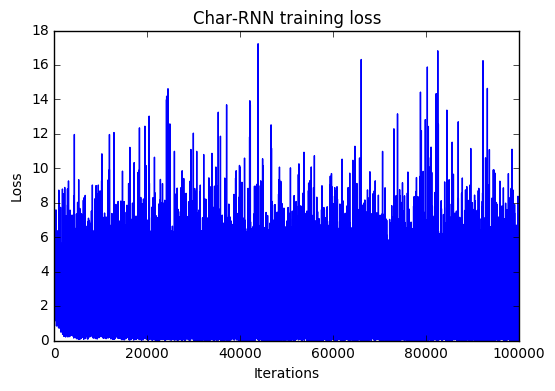

In [24]:
# Decreased seq_length
# Also updated prev_state in step, which is the expected action
if __name__ == "__main__":
    VOCAB_SIZE = 40
    text = vocab2vec(VOCAB_SIZE, vocab_length = 10**7)
    tfrnn = TFBasicRNN(vocab_size=VOCAB_SIZE, hidden_size=100, seq_length=1)
    tfrnn.train(text)

shape is: (992170, 40)
step: 0 - p: 0 -- loss: 3.760979
----
 kgg,lu.zjg6rpjc0vwqa7p'9dtmlje.0idrt837p pgvfg2yl,jh0jk5q2nnaianw6bj.eofvzv9w, ,wunlla.'2.vjm40aritdau'j663f84c.xn7twssldjtly1io 491fb.. 'j1q.gu.fzjubuv5sz1bvc7fac'6av0off.'d, v.ybxqgep03l 5flu.2an5o9 
----

step: 1000 - p: 5000 -- loss: 2.807546
----
   setisstes, oifs s eesystiltominiy eowibwtoeetyettsmtis aed tl n id mttmityha tf t o isiran 'omiaostnwt tss,ooslohrv ypeis  faet oorya.fyytioiwids irttn ilefetetie unvht i sfle  triinrerrrertp o'roit 
----

step: 2000 - p: 10000 -- loss: 2.794312
----
  uho tt gtassna rilsuin anvtbcg  at iidw  l fil tl egc. sa itsfro tapsg  a  glasecat  sneit  o.feeatecfbgrsiss anietr s apu seadatosi tisso gini ocaiedg n . tr  e  atswsimfgaaeisntte cfva m b.gesht oa 
----

step: 3000 - p: 15000 -- loss: 3.084448
----
  u rl  liatm e   rumt tyuaaautv vc om   orsmvelseoe t eetovle  ke cplni ,eeatlzly rliwermes liu  oueoo eeuuvrvyte,hr pty,rsgur,.l8. owt    ay eltp0 o,eo cy ese  eel srnvalemr ls

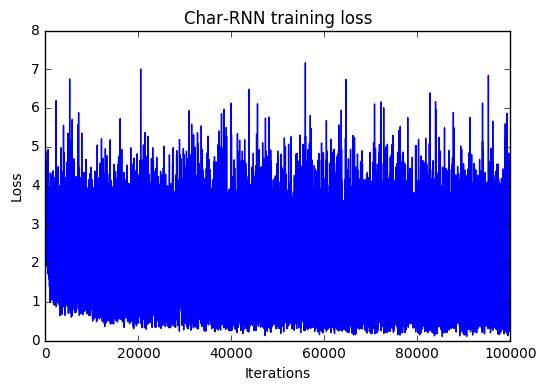

In [27]:
# Updated prev_state in step, which is the expected action
if __name__ == "__main__":
    VOCAB_SIZE = 40
    text = vocab2vec(VOCAB_SIZE, vocab_length = 10**6)
    tfrnn = TFBasicRNN(vocab_size=VOCAB_SIZE, hidden_size=100, seq_length=5)
    tfrnn.train(text)

In [5]:
# Multi-layer RNN
# You need to manually change the APIs whenever the layer number changes.

class TFMultiLayerRNN(object):
    def __init__(self, vocab_size, hidden_sizes, seq_length):
        # size of vocabulary. 26 + number of punctuations
        self.vocab_size = vocab_size
        
        self.hidden_sizes = [100, 100, 100]
        
        self.seq_length = seq_length
        
        self.graph = tf.Graph()
        
        # define and setup tf graph nodes
        
        self._create_constants()
        
        self._create_networks()
        
        self.ix_to_char = 'abcdefghijklmnopqrstuvwxyz .,\'1234567890";'
    
    def _weight(self, shape_, name_):
        return tf.Variable(tf.random_normal(stddev=0.1, shape=shape_), dtype = tf.float32, name=name_)
    
    def _bias(self, shape_, name_):
        return tf.ones(shape=shape_, name=name_)
    
    def _create_networks(self):
        hidden_sizes = self.hidden_sizes
        
        with self.graph.as_default():
            self.inputs = tf.placeholder(shape=[self.seq_length, self.vocab_size], dtype=tf.float32, name='inputs')
            self.targets = tf.placeholder(shape=[self.seq_length, self.vocab_size], dtype=tf.float32, name='targets')
            self.init_states = []
            for i in range(len(hidden_sizes)):
                init_state = tf.placeholder(shape=[self.seq_length, self.hidden_sizes[i]], dtype=tf.float32, name='state')
                self.init_states.append(init_state)
            
            layer_sizes = [self.vocab_size] + hidden_sizes
            prev = self.inputs
            
            Wxhs = []
            hs = []
            Whhs = []
            
            for l in range(1, len(layer_sizes)):
                with tf.name_scope('layer_' + str(l)):
                    Wxh = self._weight(shape_=[layer_sizes[l-1], layer_sizes[l]], name_="Wxh")
                    Whh = self._weight(shape_=[layer_sizes[l], layer_sizes[l]], name_="Whh")
                    b = self._bias(shape_=[layer_sizes[l]], name_="b")
                    h = tf.tanh(tf.matmul(prev, Wxh) + tf.matmul(self.init_states[l-1], Whh) + b)
                    prev = h
                    Wxhs.append(Wxh)
                    hs.append(h)
                    
            Why = self._weight(shape_=[layer_sizes[-1], self.vocab_size], name_="Why")
            by = self._bias(shape_=[self.vocab_size], name_="by")
            y = tf.tanh(tf.matmul(prev, Why) + by) # Same shape as self.targets
            
            self.update_states = hs
            
            # Forward pass through the output sample sequence
            yts = []
            for t, yt in enumerate(tf.split(y, self.seq_length, axis=0)):
                yts.append(yt)
            self.outputs = tf.concat(yts, axis=0)    
            
            # Convert output to softmax
            self.outputs_softmax = tf.nn.softmax(yts[-1])
            
            # Define the loss
            self.loss = tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits(labels=self.targets, logits=self.outputs))
            
            # Optimizer steps
            self.optimizer = tf.train.AdamOptimizer()
            grads_and_vars = self.optimizer.compute_gradients(self.loss)
            clipped_grads_and_vars = []
            for grad, var in grads_and_vars:
                clipped_grad = tf.clip_by_value(grad, -self.grad_limit, self.grad_limit)
                clipped_grads_and_vars.append((clipped_grad, var))
            self.updates = self.optimizer.apply_gradients(clipped_grads_and_vars)

  
    def _create_constants(self):
        with self.graph.as_default():
            with tf.name_scope('constants'):
                self.grad_limit = tf.constant(5.0, dtype=tf.float32, name='grad_limit')
   
    
    def train(self, text, max_iter=1000001, sample_dist=True):
        # pointer to input data
        p = 0 
        
        plt_iter = []
        plt_loss = []
        with tf.Session(graph=self.graph) as sess:
            # init variables
            sess.run(tf.global_variables_initializer())
            
            n = 0
            while (n < max_iter):
                
                # do data bookkeeping
                if p + self.seq_length + 1 >= len(text) or n == 0:
                    # reset hidden state and data pointer
                    p = 0
                    states_prev = [ np.zeros((self.seq_length, self.hidden_sizes[l])) 
                                   for l in range(len(self.hidden_sizes)) ]
                    n += 1
                    
                
               
                inputs_ohe = text[p:p+self.seq_length, :]
                targets_ohe = text[p+1:p+self.seq_length+1, :]
                
                # training step
                #print ("states_prev[0] shape: {}".format(states_prev[0].shape))
                #print ("inputs_ohe shape: {}".format(np.array(inputs_ohe).shape))
                #print ("targets_ohe shape: {}".format(np.array(targets_ohe).shape))
                feed_data = {self.init_states[i] : states_prev[i] for i in range(len(self.hidden_sizes))}
                feed_data[self.inputs] = inputs_ohe
                feed_data[self.targets] = targets_ohe
                
                cs0, cs1, cs2, loss, _ = sess.run([self.update_states[i] for i in range(len(self.hidden_sizes))] 
                                                  + [self.loss, self.updates], 
                                                  feed_dict=feed_data)
                states_prev = [cs0, cs1, cs2]
                
                # Wait until p reaches the end of training sentence, to increment n
                
                plt_iter.append(n)
                plt_loss.append(loss)
                if p % 100000 == 0 and n % 1 == 0:
                    print ('step: %d - p: %d -- loss: %f' % (n, p, loss))
                    
                if sample_dist and p % 100000 == 0 and n % 1 == 0:
                    # sample a random sequence
                    sample_length = 200
                    start_ix = np.random.randint(0, len(text) - self.seq_length)
                    
                    sample_input_vals = text[start_ix : start_ix + self.seq_length, :]
                    ixes = []
                    sample_state_prevs = states_prev
                    
                    
                    
                    for t in range(sample_length):
                        #print ("Shape of sample_state_prevs[0] is: " + str(sample_state_prevs[0].shape))
                        feed_data = {self.init_states[i] : sample_state_prevs[i] 
                                     for i in range(len(self.hidden_sizes))}
                        feed_data[self.inputs] = sample_input_vals
                        
                        
                        sample_output_softmax_val, sample_current_state = \
                            sess.run([self.outputs_softmax, self.update_states], feed_dict=feed_data)
                        
                        ix = np.random.choice(range(self.vocab_size), p=sample_output_softmax_val.ravel())
                        # Since the output is probability, ix is actually the choice of index!
                        
                        ixes.append(ix)
                        
                        
                        sample_input_vals = np.append(sample_input_vals[1:], sample_output_softmax_val, axis=0)

                    txt = ''.join(self.ix_to_char[ix] for ix in ixes)
                    print('----\n %s \n----\n' % (txt,))
                p += self.seq_length
                
                
        plt.plot(plt_iter, plt_loss)
        plt.title("Char-RNN training loss")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.savefig("training_curve_multilayer.png")


In [6]:
# Multi layer
if __name__ == "__main__":
    VOCAB_SIZE = 40
    text = vocab2vec(VOCAB_SIZE, vocab_length = 10**6)
    tfrnn = TFMultiLayerRNN(vocab_size=VOCAB_SIZE, hidden_sizes=[100, 100, 100, 100], seq_length=8)
    tfrnn.train(text)
    
# If (batch size) seq_length=1 then the loss is calculated character-by-character.
# This multi-layer RNN seems to converge much more slowly than single-layer RNN lol.

shape is: (992170, 40)
step: 1 - p: 0 -- loss: 3.627566
----
  ,b9c8cey26un8v4a.axez4'6xg14vmhbl7l11'hvhz11e''maqxy74jo8yvec7mlukoy3gx1agxe.tm.a0b7p'po'xtbus78acaltb1w13hjlqi 1dwd5mzpgnow.di7q46yn8.r,ji5b, sy3paitm. g9yhza7.b9mm9ra3oxrzi,2x51s'8pkuv2p9..lhr1jbk1 
----

step: 1 - p: 100000 -- loss: 2.612339
----
 daljoefe woe ajdlrir iu eukx9s zl7yoslooe5duef'ol4urriv  rr se alpsai5fia8iu o7deeoelrxggek4osxrnyreuly vll' uatvoeiiece,eualviia 6 duja si2ueure.vu ueetiz aeluacv, rioaiaya 7  zvenfu36 iim cabw va em 
----

step: 1 - p: 200000 -- loss: 2.945040
----
 refr9lldoysr  lc lyjas1si3duzrsgll tl yruxayb uiatiifylptedoola5epo8yotaoefe yozd8ioyhfliah  i.  ytdedxlk6y  eymv0jhaaoyi p2rry loydj lharrlyldrgye1qeghd0rdeifo a5yoyy  le .h'lfrya'isb.e felghpaowaad6 
----

step: 1 - p: 300000 -- loss: 2.954841
----
 1s 8iefaixpaaf.hict7tx de  oecii bfowooay4amqt no ihni8aiieoeykeqpio ysuitlxdee lr m5ji,ioyelv8elhs4jf'eyvki,zy7aeo9 ct7d7eog7 on rozoaaecloo..4 iwiol 7v oa1.ayyavsoeka m57iri5e6o',1

KeyboardInterrupt: 

**Afterthoughts: What is RNN?**  

Spent two days doing basic RNN. The RNN model mainly learns three sets of weights: `Wxh`, `Why` the input and output weights, and `Whh` the state transition weights. (In multi-layer one, there is one transitioning between hidden layers; but I just named them `Wxh` for simplicity). These indicate what the network can do:
- **Sample run**: the most obvious running.  
  $$\mathbf{y} = tanh(\mathbf{W_{hy}h + b_y})$$
  $$\mathbf{h}^{(t)} = tanh(\mathbf{W_{xh}x + W_{hh}h}^{(t-1)} + \mathbf{b_h})$$  
- **State transition**: they encode the information "what is likely to be the next character, given the previous characters"? So you have to provide an initial state, no matter in the training or sampling run.  

**How much can RNN store knowledge?**
There are 100*40 values in Wxh and Why, and 10000 values in Whh. In total 18000 values. I guess they can learn far more than 18000 bit information (since they are not binary values). So it can generate around 18000 meaningful words? Unlikely yet.